In [115]:
source('floroq_aaa_interaction.R')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  match = col_logical(),
  searchTerm = col_character(),
  drugName = col_character(),
  geneID = col_integer(),
  geneName = col_character(),
  longGeneName = col_character(),
  interaction = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  `Probe Set ID` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  `Probe Set ID` = col_character(),
  `Gene Symbol` = col_character(),
  `mRNA Accession` = col_character(),
  `mRNA  Source` = col_character(),
  `mRna - Description` = col_character(),
  `mRNA - xhyb` = col_character(),
  `GO Biological Process ID` = col_character(),
  `GO Biological Process Term` = col_character(),
  `GO Cellular Component ID` = col_character(),
  `GO Cellular Component Term` = col_character(),
  `GO Molecular Function ID` = col_character(),
  `GO Molecu

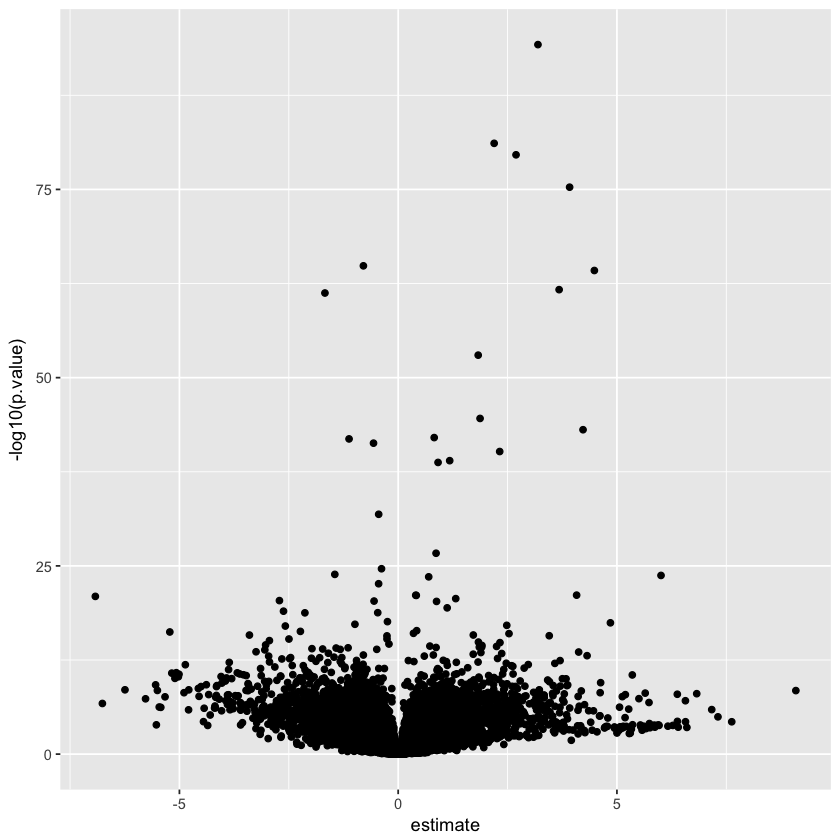

In [31]:
t.ranked_diff_genes_med  %>%  
    ggplot(aes(x=estimate, y = -log10(p.value))) +
    geom_point()

Find genes with most variance across all samples. 

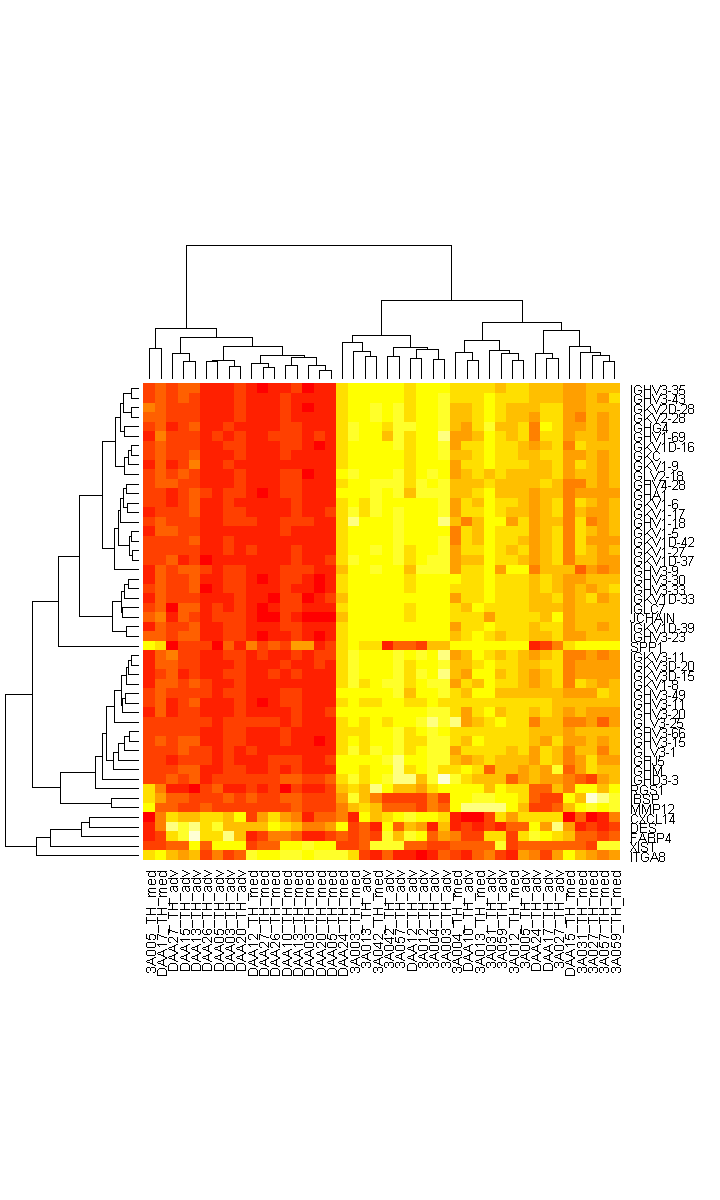

In [128]:
options(repr.plot.width=6, repr.plot.height=10)
mtx <- df  %>% filter(geneName %in% top100_var$geneName)  %>% as.data.frame()
rownames(mtx) <- mtx$geneName
mtx[1] <- NULL

mtx  %>% 
    as.matrix()  %>% 
    heatmap()

In [106]:
head(df)

geneName,3A003_TH_adv,3A003_TH_med,3A004_TH_adv,3A004_TH_med,3A005_TH_adv,3A005_TH_med,3A012_TH_adv,3A012_TH_med,3A013_TH_adv,...,DAA17_TH_adv,DAA17_TH_med,DAA20_TH_adv,DAA20_TH_med,DAA24_TH_adv,DAA24_TH_med,DAA26_TH_adv,DAA26_TH_med,DAA27_TH_adv,DAA27_TH_med
DDX11L1,4.904347,4.265507,4.789503,4.787816,4.790007,4.477702,4.524154,4.746283,4.566748,...,5.379087,5.097551,4.702073,4.471507,4.921618,4.636137,4.705687,4.788412,4.652816,4.593074
MIR1302-11,5.346779,4.692369,4.655606,5.030188,5.112649,4.723097,4.971830,5.017324,5.013170,...,5.202990,4.554488,4.510693,4.820960,5.764140,4.525053,4.681448,4.757935,6.351990,4.534733
OR4F5,3.864162,3.414337,3.485709,3.494641,3.054401,3.357600,3.351337,3.214030,3.570186,...,3.621152,3.342309,3.287571,3.580950,4.994622,3.265891,3.452977,3.861193,5.011439,3.716540
LINC01001,9.508986,9.745491,9.886945,8.987126,10.976590,9.996318,9.985667,9.290842,10.126480,...,11.042310,10.721970,13.463900,11.035490,12.596350,11.781360,14.580080,12.360650,10.323440,10.647650
LINC01061,14.483380,15.092310,15.002100,14.041800,16.368000,15.599680,15.247670,14.238510,15.216310,...,16.273500,15.837450,18.055360,15.860750,17.623130,16.228130,18.496550,16.984560,16.011310,15.422630
OR4F29,4.879474,5.797041,4.740828,4.759019,4.555406,4.688248,4.695436,4.633525,5.530511,...,4.511398,5.191504,5.504831,4.802835,5.441443,4.516523,5.050224,5.189038,5.401570,4.991282


In [127]:
df_long  %>% 
    group_by(geneName)  %>% 
    summarize(gene_variance = var(value))  %>% 
    arrange(desc(gene_variance))  %>% 
    head(50) ->
    top100_var

In [118]:
df  %>% 
    filter(geneName %in% top100_var$geneName)  %>% 
    dim

[1] 100  43